This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 25ms/step - loss: 0.6321 - accuracy: 0.8101 - val_loss: 0.2644 - val_accuracy: 0.9216
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2583 - accuracy: 0.9204 - val_loss: 0.2765 - val_accuracy: 0.9112
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1686 - accuracy: 0.9478 - val_loss: 0.2469 - val_accuracy: 0.9205
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 0.1180 - accuracy: 0.9637 - val_loss: 0.1399 - val_accuracy: 0.9593
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0867 - accuracy: 0.9732 - val_loss: 0.1349 - val_accuracy: 0.9607
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0663 - accuracy: 0.9793 - val_loss: 0.1209 - val_accuracy: 0.9657
Epoch 7/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.1171 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

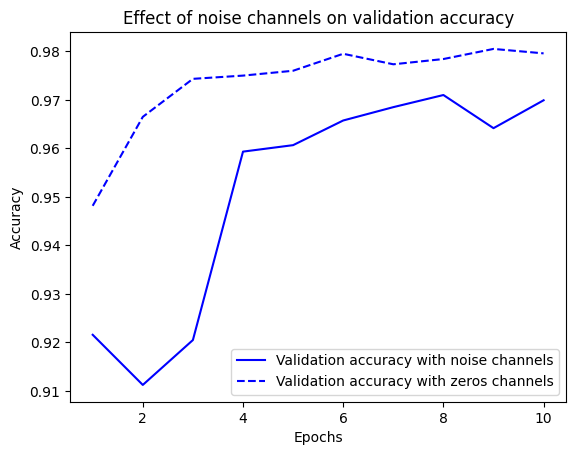

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffle = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 13ms/step - loss: 2.3158 - accuracy: 0.1049 - val_loss: 2.3059 - val_accuracy: 0.1072
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2993 - accuracy: 0.1160 - val_loss: 2.3095 - val_accuracy: 0.1072
Epoch 3/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2920 - accuracy: 0.1283 - val_loss: 2.3164 - val_accuracy: 0.1040
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2795 - accuracy: 0.1388 - val_loss: 2.3256 - val_accuracy: 0.0975
Epoch 5/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2641 - accuracy: 0.1526 - val_loss: 2.3275 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2444 - accuracy: 0.1654 - val_loss: 2.3441 - val_accuracy: 0.1013
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2215 - accuracy: 0.1807 - val_loss: 2.3604 - val_accuracy:

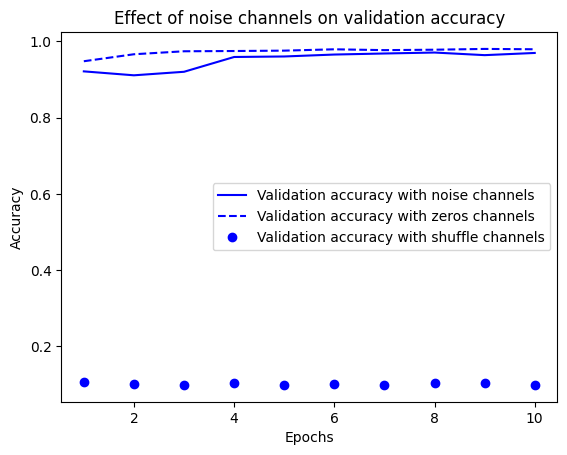

In [6]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_shuffle = history_shuffle.history["val_accuracy"][::10]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_shuffle, "bo",
         label="Validation accuracy with shuffle channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

Keep an eye out for the following when you’re choosing an evaluation protocol:
* Data representativeness—You want both your training set and test set to be representative of the data at hand. For instance, if you’re trying to classify images
of digits, and you’re starting from an array of samples where the samples are
ordered by their class, taking the first 80% of the array as your training set
and the remaining 20% as your test set will result in your training set containing only classes 0–7, whereas your test set will contain only classes 8–9. This
seems like a ridiculous mistake, but it’s surprisingly common. For this reason,
you usually should randomly shuffle your data before splitting it into training
and test sets.
* The arrow of time—If you’re trying to predict the future given the past (for example, tomorrow’s weather, stock movements, and so on), you should not randomly shuffle your data before splitting it, because doing so will create a
temporal leak: your model will effectively be trained on data from the future. In
such situations, you should always make sure all data in your test set is posterior
to the data in the training set.
* Redundancy in your data—If some data points in your data appear twice (fairly
common with real-world data), then shuffling the data and splitting it into a
training set and a validation set will result in redundancy between the training
and validation sets. In effect, you’ll be testing on part of your training data,
which is the worst thing you can do! Make sure your training set and validation
set are disjoint.

Having a reliable way to evaluate the performance of your model is how you’ll be able
to monitor the tension at the heart of machine learning—between optimization and
generalization, underfitting and overfitting.

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 536.0165 - accuracy: 0.3272 - val_loss: 2.1649 - val_accuracy: 0.2040
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 2.8992 - accuracy: 0.1968 - val_loss: 2.5970 - val_accuracy: 0.2476
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 2.6586 - accuracy: 0.1944 - val_loss: 2.3619 - val_accuracy: 0.2093
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 2.8356 - accuracy: 0.1995 - val_loss: 2.2715 - val_accuracy: 0.1452
Epoch 5/10
375/375 [==============================] - 5s 15ms/step - loss: 2.4871 - accuracy: 0.1973 - val_loss: 2.3083 - val_accuracy: 0.1862
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 2.5311 - accuracy: 0.2067 - val_loss: 2.3180 - val_accuracy: 0.2396
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 2.8990 - accuracy: 0.1963 - val_loss: 2.2077 - val_accuracy: 0.19

**The same model with a more appropriate learning rate**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3657 - accuracy: 0.9094 - val_loss: 0.1460 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1274 - accuracy: 0.9641 - val_loss: 0.1489 - val_accuracy: 0.9634
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0965 - accuracy: 0.9747 - val_loss: 0.1512 - val_accuracy: 0.9659
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0814 - accuracy: 0.9792 - val_loss: 0.1627 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0676 - accuracy: 0.9828 - val_loss: 0.1854 - val_accuracy: 0.9711
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0579 - accuracy: 0.9850 - val_loss: 0.1834 - val_accuracy: 0.9708
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0509 - accuracy: 0.9869 - val_loss: 0.1880 - val_accuracy: 0.9729

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6650 - accuracy: 0.8364 - val_loss: 0.3603 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3542 - accuracy: 0.9019 - val_loss: 0.3107 - val_accuracy: 0.9134
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.9117 - val_loss: 0.2928 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9155 - val_loss: 0.2849 - val_accuracy: 0.9196
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2924 - accuracy: 0.9184 - val_loss: 0.2788 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2860 - accuracy: 0.9199 - val_loss: 0.2744 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9219 - val_loss: 0.2715 - val_accuracy: 0.9247
Epoch 

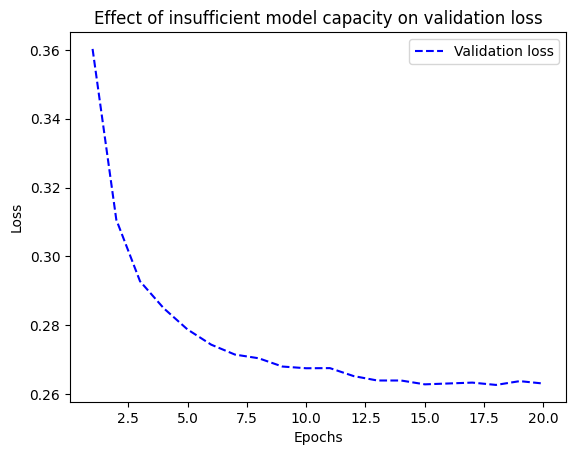

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.3737 - accuracy: 0.8947 - val_loss: 0.1942 - val_accuracy: 0.9462
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1679 - accuracy: 0.9503 - val_loss: 0.1324 - val_accuracy: 0.9612
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1175 - accuracy: 0.9653 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0903 - accuracy: 0.9732 - val_loss: 0.1175 - val_accuracy: 0.9671
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.1006 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0983 - val_accuracy: 0.9726
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.1031 - val_accuracy: 0.9715
Epoch 

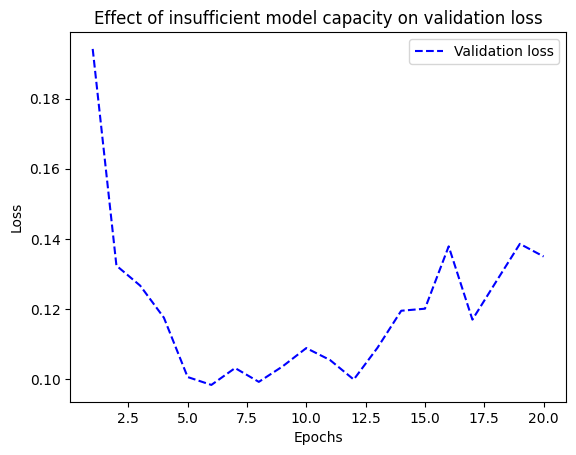

In [12]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5381 - accuracy: 0.7677 - val_loss: 0.4050 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3353 - accuracy: 0.8955 - val_loss: 0.3288 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2510 - accuracy: 0.9187 - val_loss: 0.2923 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2024 - accuracy: 0.9340 - val_loss: 0.2753 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1672 - accuracy: 0.9471 - val_loss: 0.2840 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1427 - accuracy: 0.9548 - val_loss: 0.2955 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1234 - accurac

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 163ms/step - loss: 0.6413 - accuracy: 0.6131 - val_loss: 0.5953 - val_accuracy: 0.6589
Epoch 2/20
30/30 [==============================] - 3s 107ms/step - loss: 0.5605 - accuracy: 0.7526 - val_loss: 0.5494 - val_accuracy: 0.7927
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5137 - accuracy: 0.8234 - val_loss: 0.5222 - val_accuracy: 0.7903
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4785 - accuracy: 0.8603 - val_loss: 0.4961 - val_accuracy: 0.8442
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.4491 - accuracy: 0.8842 - val_loss: 0.4792 - val_accuracy: 0.8486
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4231 - accuracy: 0.9041 - val_loss: 0.4615 - val_accuracy: 0.8633
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3968 - accuracy: 0.9203 - val_loss: 0.4418 - val_accuracy: 0.8783
Epoch 8/20


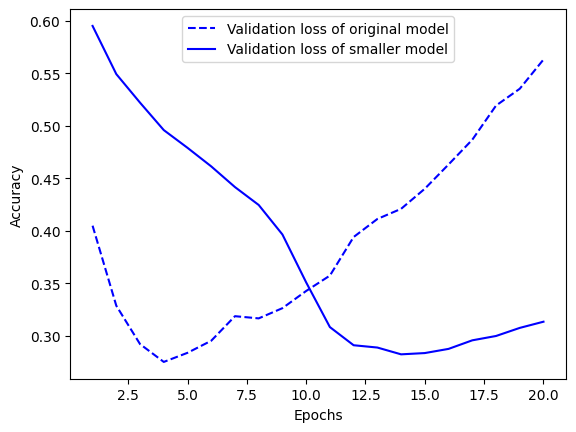

In [18]:
val_acc_origin = history_original.history["val_loss"]
val_acc_small = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_origin, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_acc_small, "b-",
         label="Validation loss of smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 15s 470ms/step - loss: 0.5467 - accuracy: 0.7345 - val_loss: 0.3950 - val_accuracy: 0.8233
Epoch 2/20
30/30 [==============================] - 11s 380ms/step - loss: 0.2999 - accuracy: 0.8782 - val_loss: 0.2807 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 12s 416ms/step - loss: 0.2362 - accuracy: 0.9027 - val_loss: 0.2693 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 12s 414ms/step - loss: 0.1781 - accuracy: 0.9310 - val_loss: 0.2817 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 10s 331ms/step - loss: 0.1317 - accuracy: 0.9516 - val_loss: 0.3022 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 10s 345ms/step - loss: 0.1013 - accuracy: 0.9655 - val_loss: 0.3572 - val_accuracy: 0.8710
Epoch 7/20
30/30 [==============================] - 11s 357ms/step - loss: 0.0758 - accuracy: 0.9750 - val_loss: 0.3509 - val_accuracy: 0.8855

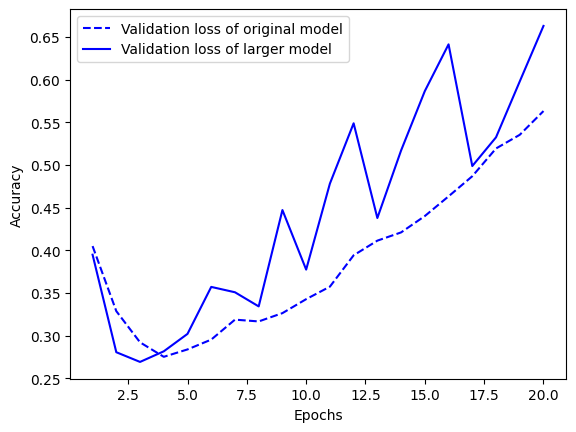

In [20]:
val_acc_origin = history_original.history["val_loss"]
val_acc_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_origin, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_acc_larger, "b-",
         label="Validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.6449 - accuracy: 0.7642 - val_loss: 0.5146 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4378 - accuracy: 0.8839 - val_loss: 0.4147 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3544 - accuracy: 0.9047 - val_loss: 0.3713 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3106 - accuracy: 0.9202 - val_loss: 0.3595 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2858 - accuracy: 0.9281 - val_loss: 0.3543 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2673 - accuracy: 0.9350 - val_loss: 0.3543 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2550 - accuracy: 0.9407 - val_loss: 0.3591 - val_accuracy: 0.8845
Epoch 8/20
30

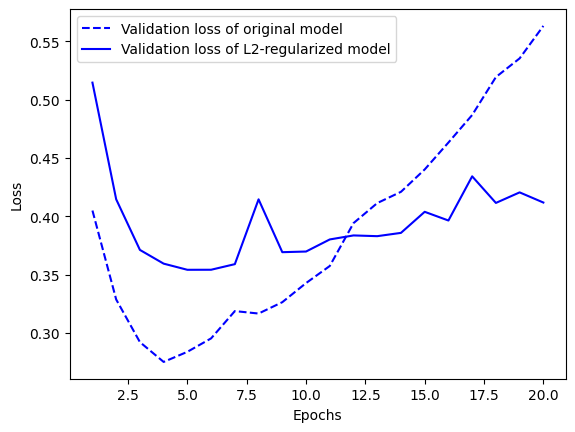

In [25]:
val_acc_origin = history_original.history["val_loss"]
val_acc_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_origin, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_acc_l2_reg, "b-",
         label="Validation loss of L2-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Different weight regularizers available in Keras**

In [23]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.6439 - accuracy: 0.6305 - val_loss: 0.5496 - val_accuracy: 0.8374
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5359 - accuracy: 0.7551 - val_loss: 0.4371 - val_accuracy: 0.8613
Epoch 3/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4576 - accuracy: 0.8127 - val_loss: 0.3737 - val_accuracy: 0.8717
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3945 - accuracy: 0.8530 - val_loss: 0.3253 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3447 - accuracy: 0.8761 - val_loss: 0.3013 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3068 - accuracy: 0.8940 - val_loss: 0.2845 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2760 - accuracy: 0.9095 - val_loss: 0.2800 - val_accuracy: 0.8853
Epoch 8/20
30

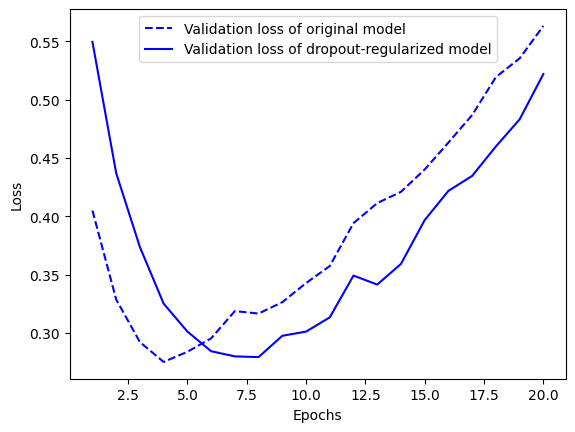

In [26]:
val_acc_origin = history_original.history["val_loss"]
val_acc_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_origin, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_acc_dropout, "b-",
         label="Validation loss of dropout-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Wram up

To recap, these are the most common ways to maximize generalization and prevent
overfitting in neural networks:
* Get more training data, or better training data.
* Develop better features.
* Reduce the capacity of the model.
* Add weight regularization (for smaller models).
* Add dropout.

## Summary

* The purpose of a machine learning model is to generalize: to perform accurately
on never-before-seen inputs. It’s harder than it seems.
* A deep neural network achieves generalization by learning a parametric model
that can successfully interpolate between training samples—such a model can be
said to have learned the “latent manifold” of the training data. This is why deep
learning models can only make sense of inputs that are very close to what
they’ve seen during training.
* The fundamental problem in machine learning is the tension between optimization
and generalization: to attain generalization, you must first achieve a good fit to
the training data, but improving your model’s fit to the training data will inevitably start hurting generalization after a while. Every single deep learning best
practice deals with managing this tension.
* The ability of deep learning models to generalize comes from the fact that they
manage to learn to approximate the latent manifold of their data, and can thus
make sense of new inputs via interpolation.
* It’s essential to be able to accurately evaluate the generalization power of your
model while you’re developing it. You have at your disposal an array of evaluation methods, from simple holdout validation to K-fold cross-validation and
iterated K-fold cross-validation with shuffling. Remember to always keep a completely separate test set for final model evaluation, since information leaks from
your validation data to your model may have occurred.
* When you start working on a model, your goal is first to achieve a model that
has some generalization power and that can overfit. Best practices for doing
this include tuning your learning rate and batch size, leveraging better architecture priors, increasing model capacity, or simply training longer.
* As your model starts overfitting, your goal switches to improving generalization
through model regularization. You can reduce your model’s capacity, add dropout
or weight regularization, and use early stopping. And naturally, a larger or better dataset is always the number one way to help a model generalize.